In [1]:
from Data import InfinityMapDataGenerator
from GAN import Pix2PixGAN
from Networks import Discriminator, Generator
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
import tensorflow as tf

def imshow(x):
    plt.imshow(x[..., ::-1])
    plt.show()

In [2]:
gen = Generator()
disc = Discriminator()

gan = Pix2PixGAN(gen, disc)

In [3]:
images = glob.glob('/home/valeron/data_disk/Datasets/maps/train/*.*')
images = sorted(images)
images = [cv2.imread(i) for i in images]

In [4]:
def map_fn(image):
    image = image / 127.5 - 1
    
    x_s, y_s = np.random.randint(0, 89, size=2)

    x = image[:, :600]
    y = image[:, 600:]

    if np.random.random() >= 0.5:
        x = np.flip(x, 1)
        y = np.flip(y, 1)
    
    if np.random.random() >= 0.5:
        x = np.flip(x, 0)
        y = np.flip(y, 0)

    y = y[y_s:512+y_s, x_s:512+x_s]
    x = x[y_s:512+y_s, x_s:512+x_s]
    
    return x, y

datagen = InfinityMapDataGenerator(images, map_fn)

In [5]:
x, y = next(datagen)

def callback(i):
    qwe = gen(x, training=True)[0] * 0.5 + 0.5
    cv2.imwrite(f'./callbacks/{i}.png', np.uint8(qwe * 255))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


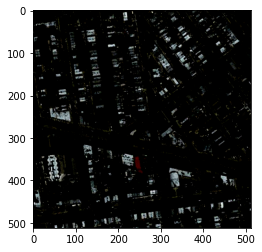

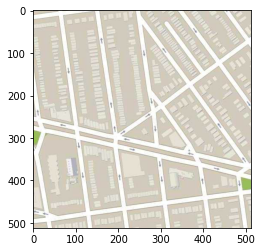

In [6]:
imshow(x[0])
imshow(y[0])

In [7]:
gan.fit(datagen, 200_000, callback)

0: adv_loss: 0.7973999977111816 	 l1_loss: 0.7912999987602234	 gen_loss: 79.92520141601562 	 disc_loss: 1.7019000053405762
100: adv_loss: 1.5013999938964844 	 l1_loss: 0.2224999964237213	 gen_loss: 23.752199172973633 	 disc_loss: 1.0161000490188599
200: adv_loss: 0.6732000112533569 	 l1_loss: 0.07339999824762344	 gen_loss: 8.013999938964844 	 disc_loss: 1.2197999954223633
300: adv_loss: 1.726099967956543 	 l1_loss: 0.07970000058412552	 gen_loss: 9.697600364685059 	 disc_loss: 1.430400013923645
400: adv_loss: 2.00219988822937 	 l1_loss: 0.0803999975323677	 gen_loss: 10.045100212097168 	 disc_loss: 0.49239999055862427
500: adv_loss: 1.2372000217437744 	 l1_loss: 0.11050000041723251	 gen_loss: 12.288900375366211 	 disc_loss: 0.5705000162124634
600: adv_loss: 1.4661999940872192 	 l1_loss: 0.13300000131130219	 gen_loss: 14.761799812316895 	 disc_loss: 1.850600004196167
700: adv_loss: 0.8605999946594238 	 l1_loss: 0.10289999842643738	 gen_loss: 11.148200035095215 	 disc_loss: 0.6531999707221

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


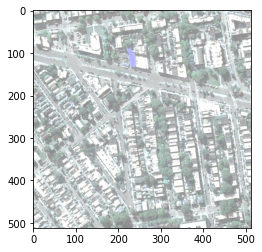

In [7]:
plt.imshow(x[0] * 0.5 + 1)

In [7]:
checkpoint = tf.train.Checkpoint(gen=gan.generator, disc=gan.discriminator, gen_opt=gan.generator_optimizer, disc_opt=gan.discriminator_optimizer)

In [8]:
checkpoint.restore('./gitignore/img2maps/checkpoint-1.index')

Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


In [14]:
gen(np.random.normal(size=[1, 512, 512, 3]))

<tf.Tensor: shape=(1, 512, 512, 3), dtype=float32, numpy=
array([[[[ 1.12807536e-02, -4.88099689e-03,  1.97567753e-02],
         [ 2.49999436e-03, -6.40874263e-03,  1.20553691e-02],
         [ 2.01538112e-02, -9.31295659e-03,  1.07352936e-03],
         ...,
         [ 3.03283781e-02,  3.60687263e-03,  1.75162740e-02],
         [-1.10998505e-03,  1.23382807e-02, -1.32108377e-02],
         [ 6.61088573e-03,  4.92445473e-03, -1.11621991e-03]],

        [[-2.01490074e-02,  5.55224530e-03,  1.28129153e-02],
         [ 4.33639139e-02, -7.24072335e-03, -3.91407534e-02],
         [-7.47937476e-03,  2.35461835e-02,  3.96742783e-02],
         ...,
         [ 3.81466672e-02,  7.23218371e-04,  1.07174143e-02],
         [-5.66595569e-02,  3.99947874e-02, -3.22528486e-03],
         [-6.89010369e-03, -1.28387390e-02, -1.00294678e-02]],

        [[-4.27057780e-03, -1.48856463e-02,  2.30770372e-02],
         [-3.22232880e-02, -2.38203928e-02,  2.11973954e-02],
         [-7.38416985e-02,  2.87972577e-02

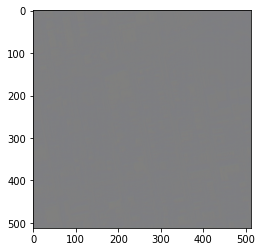

In [9]:
image = cv2.imread('/home/valeron/data_disk/Datasets/maps/val/1.jpg')
image = cv2.resize(image, (1024, 512))[np.newaxis, :, :512] / 127.5 - 1
res = gen(image, training=False)[0] * 0.5 + 0.5
imshow(res)